# 2021.9월에 조사된 메이플 하프이어링 드메템 가격 데이터 입니다(데이터 표준화 완료).

## 변수정보

- p: 가격
- item: 아이템 획득 확률%
- meso: 메소 드랍률%
- stat: 주스텟 종류(1-힘, 2-덱스, 3-인트, 4-럭, 5-올스텟, 6-체력, 0-잡옵) 여기서 잡옵은 잠재 3줄에서 2번째와 - - 3번째 주스텟이 불일치하는 경우 전부 잡옵으로 표시되었습니다.
- 2st: 잠재옵션 두번째 옵션의 주스텟 % (잡옵일 경우 0으로 표기)
- 3rd: 잠재옵션 세번째 옵션의 주스텟 % (잡옵일 경우 0으로 표기)
- sell_complete: 경매장 판매완료 여부(0-판매중, 1-판매완료)
## 데이터 예시 설명
- 예를 들어 첫 번째 행의 데이터를 해석하면, 약 42억, 드 2줄, 체력 9%(6-체력 주스텟 | 9%, 잠재옵션이 3줄이기에 1st 드랍20%, 2st hp 9%, 3rd 드랍 20%)인 판매완료된 하프이어링으로 보시면 되겠습니다.

In [156]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [110]:
with open('./archive/oldharp.txt', encoding='utf-8') as file:
    lines = file.readlines()

data = [line.strip().split() for line in lines]

In [111]:
df = pd.DataFrame(data[1:], columns=data[0])

In [112]:
df

,p,item,meso,stat,2st,3rd,sell_complete
0,4199999999,40,0,6,9,0,1
1,4199999999,40,0,2,9,0,1
2,4495000000,40,0,3,9,0,1
3,4500000000,40,0,4,9,0,1
4,4549999999,40,0,3,9,0,1
...,...,...,...,...,...,...,...
402,199999999,0,20,0,0,0,0
403,199999999,0,20,0,0,0,0
404,250000000,0,20,5,9,6,0
405,198888888,0,20,0,0,0,0


In [113]:
df['p'] = pd.to_numeric(df['p'], errors='coerce')
df['item'] = pd.to_numeric(df['item'], errors='coerce')
df['meso'] = pd.to_numeric(df['meso'], errors='coerce')
df['stat'] = pd.to_numeric(df['stat'], errors='coerce')
df['2st'] = pd.to_numeric(df['2st'], errors='coerce')
df['3rd'] = pd.to_numeric(df['3rd'], errors='coerce')
df['sell_complete'] = pd.to_numeric(df['sell_complete'], errors='coerce')


In [114]:
df

,p,item,meso,stat,2st,3rd,sell_complete
0,4199999999,40,0,6,9,0,1
1,4199999999,40,0,2,9,0,1
2,4495000000,40,0,3,9,0,1
3,4500000000,40,0,4,9,0,1
4,4549999999,40,0,3,9,0,1
...,...,...,...,...,...,...,...
402,199999999,0,20,0,0,0,0
403,199999999,0,20,0,0,0,0
404,250000000,0,20,5,9,6,0
405,198888888,0,20,0,0,0,0


In [115]:
df[df['item'] == 0].count()

p                138
item             138
meso             138
stat             138
2st              138
3rd              138
sell_complete    138
dtype: int64

In [150]:
gb_sell = df.groupby('sell_complete')

<Axes: xlabel='sell_complete', ylabel='p'>

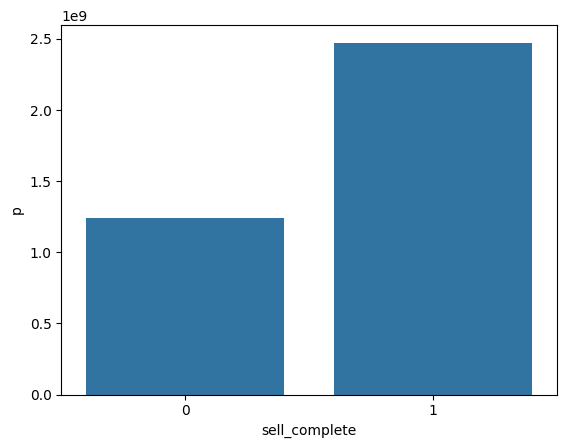

In [159]:

sns.barplot(gb_sell['p'].mean())

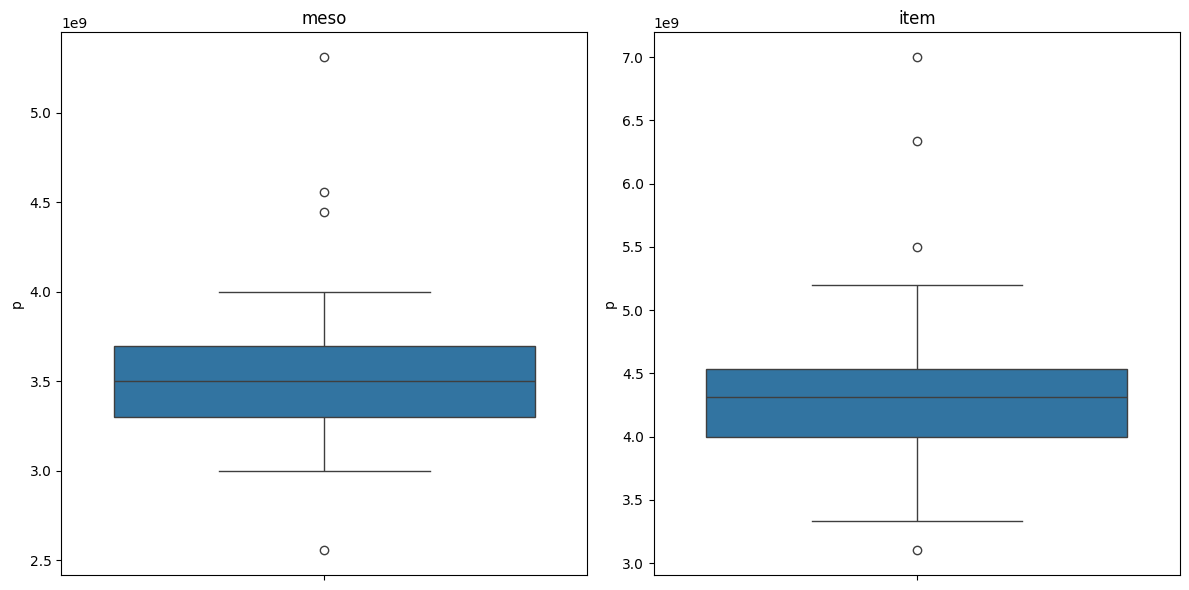

In [191]:
df[df['item'] + df['meso'] > 20]

plt.figure(figsize=(12, 6))

# 첫 번째 박스플롯 (meso >= 20)
plt.subplot(1, 2, 1)  # 1행, 2열의 첫 번째 그래프
sns.boxplot(df.loc[df['meso'] > 20, 'p'])
plt.title('meso')

# 두 번째 박스플롯 (item >= 20)
plt.subplot(1, 2, 2)  # 1행, 2열의 두 번째 그래프
sns.boxplot(df.loc[df['item'] > 20, 'p'])
plt.title('item')

# 그래프 표시
plt.tight_layout()
plt.show()

<Axes: xlabel='stat', ylabel='p'>

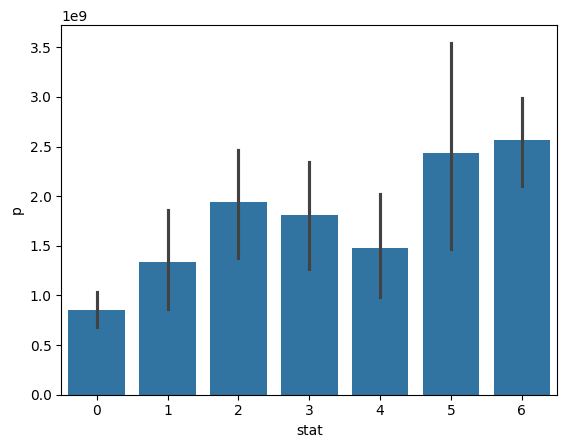

In [193]:
sns.barplot(x = df['stat'], y = df['p'])